Este notebook faz parte do projeto [Ciência de dados e ML: fundamentos e aplicações.](https://www.kaggle.com/code/regisvargas/ci-ncia-de-dados-e-ml-fundamentos-e-aplica-es)

# Produto interno

O **produto interno** é a ferramenta matemática que pode estar nos bastidores das recomendações de serviços como Netflix e Kindle, ou no processamento de linguagem natural de IAs generativas, como o ChatGPT. Veja, abaixo, como defini-lo de maneira formal.

Sejam $\vec{x} = (x_1, x_2, \cdots, x_n)$ e $\vec{y} = (y_1, y_2, \cdots, y_n)$ vetores com $n$ coordenadas, onde $n$ é um número natural.

O **produto interno** entre $\vec{x}$ e $\vec{y}$ é definido como:

$$
\sum_{i=1}^{n} x_i\cdot y_i
$$

Então para, por exemplo, calcular o prosuto interno entre o vetor $\vec{x}=(-1,2,5)$ e o vetor $\vec{y}=(2,-3,7)$, fazemos os seguinte:

$$
-1\cdot 2 + 2\cdot (-3) + 5\cdot 7 
$$
$$
= -2-6+35
$$
$$
= 27
$$

Para verifcar se acertamos o cálculo, podemos calcular este mesmo produto interno, através da função `np.dot`. Veja abaixo.

In [1]:
import numpy as np

x = np.array([-1,2,5])

y = np.array([2,-3,7])

print(np.dot(x,y))

27


Ou, equivalentemente, através do operador `@`. O qual, equivale a operação de produto inteVeja:

In [2]:
print(x@y)

27


Podemos mostrar que:

$$
\sum_{i=1}^{n}x_i\cdot y_i = |x|\cdot |y| \cdot cos(\theta)
$$

Onde $\theta$ é o ângulo formado pelos vetores $\vec{x}$ e $\vec{y}$.

Sob esta perspectiva, fica subentendido que primeiro fazemos a projeção de $\vec{y}$ sobre $\vec{x}$ e, posteriormente, multiplicamos o tamanho desta "sombra" pelo tamanho do vetor $\vec{x}$.

Isso pode ser mostrado graficamente, utilizando a biblioteca Matplotlib, veja abaixo.

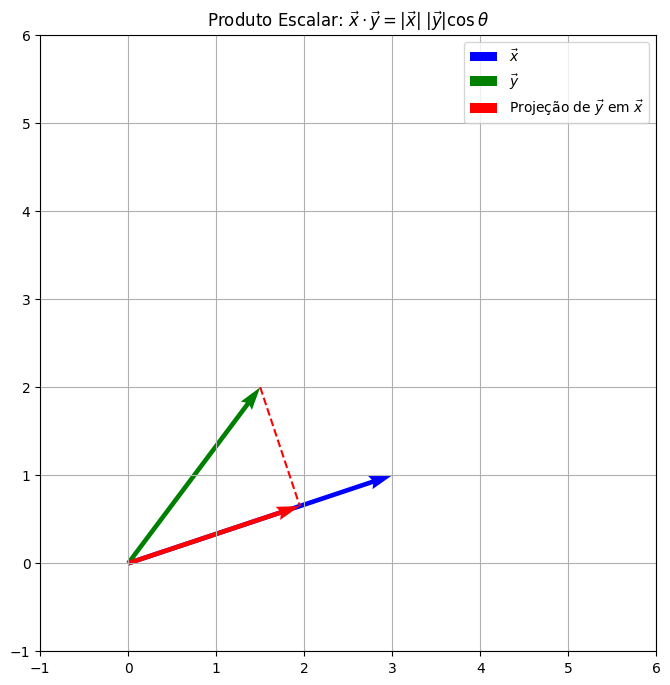

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector_projection():
    # Definindo os vetores
    x = np.array([3, 1])
    y = np.array([1.5, 2])
    
    # Calculando a projeção de y sobre x
    proj_y_on_x = (np.dot(y, x) / np.dot(x, x)) * x
    
    # Criando a figura e os eixos
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-1, 6)
    ax.set_ylim(-1, 6)
    ax.set_aspect('equal')
    ax.grid(True)
    
    # Plotando os vetores utilizando plt.quiver
    ax.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='blue', label=r'$\vec{x}$')
    ax.quiver(0, 0, y[0], y[1], angles='xy', scale_units='xy', scale=1, color='green', label=r'$\vec{y}$')
    ax.quiver(0, 0, proj_y_on_x[0], proj_y_on_x[1], angles='xy', scale_units='xy', scale=1, color='red', label=r'Projeção de $\vec{y}$ em $\vec{x}$')
    
    # Desenhando a linha tracejada para evidenciar a projeção
    ax.plot([y[0], proj_y_on_x[0]], [y[1], proj_y_on_x[1]], 'r--')
    
    # Título e legenda
    ax.set_title(r'Produto Escalar: $\vec{x}\cdot\vec{y} = |\vec{x}|\;|\vec{y}|\cos\theta$')
    ax.legend(loc='upper right')
    
    plt.show()

plot_vector_projection()


# Alinhamento dos vetores

Se $\vec{x}$ e $\vec{y}$ estão perfeitamente alinhados, então $\theta = 0$ e, consequentemente, $cos(\theta) = 1$. Neste caso, o produto interno entre $\vec{x}$ e $\vec{y}$ atinge o valor máximo.

Se $\vec{x}$ e $\vec{y}$ forem perpendiculares, isto é, $\theta = 90°$, então $cos(\theta) = 0$. O que nos dá um produto interno entre $\vec{x}$ e $\vec{y}$ também igual a zero.

Se $\vec{y}$ aponta no sentido oposto de $\vec{x}$, então $\theta = 180°$ e, consequentemente, $cos(\theta) = -1$. Neste caso, o valor do produto interno fica negativo.

# Aplicação

Suponha que $\vec{u} = (0.7, 0.9, -0.4, -1.0)$ represente o interesse de um usuário nos respectivos gêneros: comédia, ação, drama e suspense.

Suponha $\vec{v} = (0.9, 0.6, -0.1, -0.9)$ e $\vec{w} = (0.1, 0.3, -0.8, 0.7)$ sejam filmes codificados para os mesmos gêneros.

Qual dos dois, filmes deveriam ser sugeridos ao usuário?

Neste caso, podemos usar o produto interno como um score para cada filme. Veja o código abaixo.

In [4]:
u = np.array([0.7, 0.9, -0.4, -1.0])

v = np.array([0.9, 0.6, -0.1, -0.9])

w = np.array([0.1, 0.3, -0.8, 0.7])

print(u@v)

print(u@w)

2.11
-0.03999999999999987


Como podemos ver, pelos valores acima, a melhor indicação para o usuário é o filme representado pelo vetor $\vec{v}$.

Referências

[Mathematics for Machine Learning and Data Science Specialization](https://www.coursera.org/specializations/mathematics-for-machine-learning-and-data-science)

[Unveiling the Inner Product: The Key to Similarity in Math, Machine Learning, and Beyond](https://kalami.medium.com/unveiling-the-inner-product-the-key-to-similarity-in-math-machine-learning-and-beyond-290b43cf34fd)